<a href="https://colab.research.google.com/github/irdinainsharuki/MLbootcampNA/blob/main/DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #28x28 images of hand-written digits 0-9

In [ ]:
plt.imshow(x_train[0], cmap = 'gray')

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.summary()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8224 - loss: 7.4840
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9018 - loss: 0.4099
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9268 - loss: 0.3033


In [25]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Test loss: {val_loss}, Test accuracy: {val_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9249 - loss: 0.3299
Test loss: 0.30658015608787537, Test accuracy: 0.9290000200271606


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


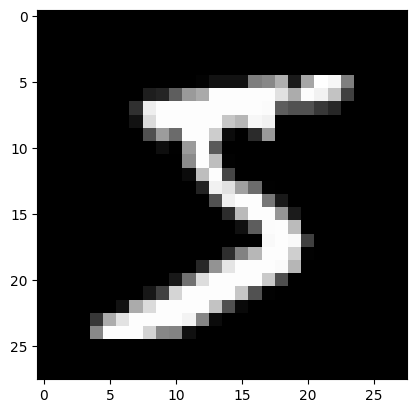

Prediction:  3


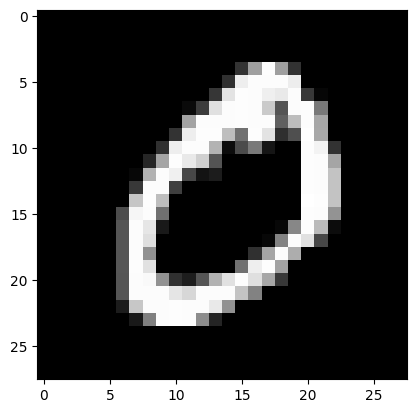

Prediction:  0


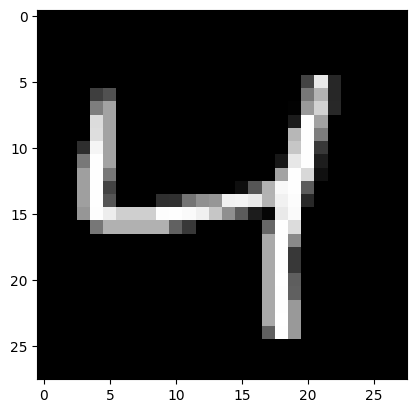

Prediction:  4


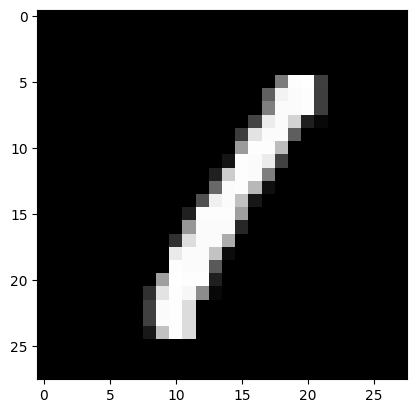

Prediction:  1


In [26]:
number_of_images = 4

probabilities = model.predict(x_train[:number_of_images])
predictions = np.argmax(probabilities, axis=1)
for index in range(len(probabilities)):
  plt.imshow(x_train[index], cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index])

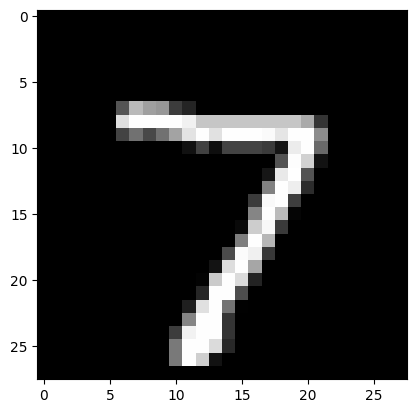

True Label: 7, Prediction: 3
Incorrect prediction


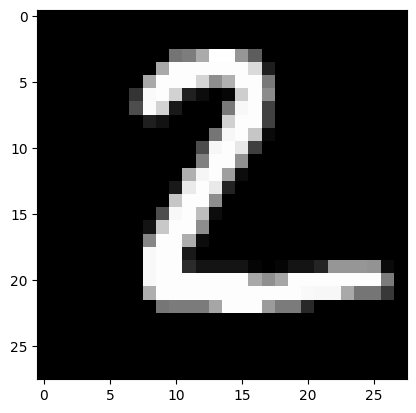

True Label: 2, Prediction: 0
Incorrect prediction


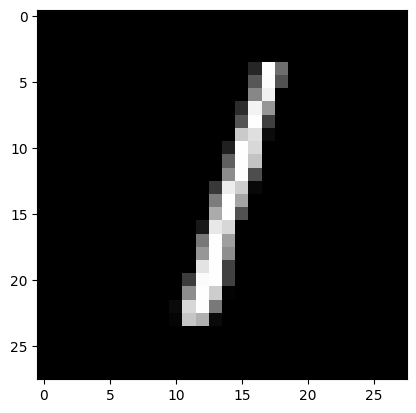

True Label: 1, Prediction: 4
Incorrect prediction


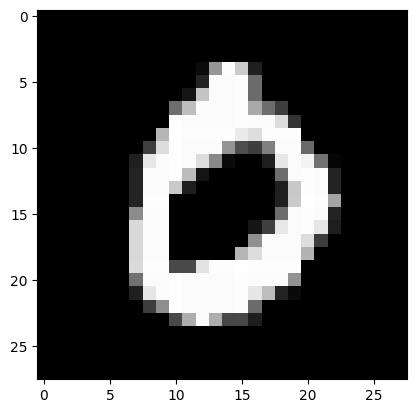

True Label: 0, Prediction: 1
Incorrect prediction


In [27]:
for i in range(min(len(x_test), len(predictions))):
    plt.imshow(x_test[i], cmap='gray')
    plt.show()
    print(f"True Label: {y_test[i]}, Prediction: {predictions[i]}")
    if y_test[i] != predictions[i]:
        print("Incorrect prediction")
